In [1]:
import numpy as np
import pandas as pd

### Load the training data:
* normalize XYZ with the 1st Atom
* get the distance of each 2 Atoms
* get the angle of each 3 Atoms
* get the angle of each 5 Atoms

In [2]:
PATH = 'test01.pdb'

In [3]:
data = pd.read_csv(PATH,sep='\s+')

data.columns = ['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998
ATOM,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0
ATOM,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0
ATOM,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0
ATOM,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0
ATOM,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0
ATOM,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0
ATOM,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0
ATOM,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0
ATOM,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0
ATOM,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0


### Get the angle of each 3 Atoms

In [4]:
def get_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return(np.degrees(angle))

def dots_angle(data):
    data.index = range(len(data))
    angles = [0]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        angles.append(get_angle(a, b, c))
    angles.append(0)
    return(angles)

In [5]:
data['dots-angle'] = dots_angle(data)
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0,0.000000
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0,107.748079
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0,118.529798
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0,104.618734
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0,110.738952
5,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0,109.130631
6,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0,127.755005
7,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0,115.752242
8,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0,122.155375
9,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0,126.320389


### Normalize XYZ with the 1st Atom

In [6]:
data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952
5,6,C6,OLA,1,4.54,0.44,-4.32,1.0,0.0,109.130631
6,7,C7,OLA,1,3.85,-0.06,-5.59,1.0,0.0,127.755005
7,8,C8,OLA,1,4.34,0.07,-7.04,1.0,0.0,115.752242
8,9,C9,OLA,1,3.45,-0.57,-8.1,1.0,0.0,122.155375
9,10,C10,OLA,1,3.55,-0.24,-9.45,1.0,0.0,126.320389


### Get the distance of each 2 Atoms

In [7]:
def dots_distance(data):
    data.index = range(len(data))
    distances = []
    for k in range(len(data)-1):
        p1 = data.loc[k, ['X', 'Y', 'Z']]
        p2 = data.loc[k+1, ['X', 'Y', 'Z']]
        squared_dist = np.sum((p1-p2)**2, axis=0)
        dist = np.sqrt(squared_dist)
        distances.append(dist)
    distances.append(0)
    return(distances)

In [8]:
data['dots-distance'] = dots_distance(data)
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000,1.531307
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692
5,6,C6,OLA,1,4.54,0.44,-4.32,1.0,0.0,109.130631,1.529379
6,7,C7,OLA,1,3.85,-0.06,-5.59,1.0,0.0,127.755005,1.536066
7,8,C8,OLA,1,4.34,0.07,-7.04,1.0,0.0,115.752242,1.524893
8,9,C9,OLA,1,3.45,-0.57,-8.1,1.0,0.0,122.155375,1.393341
9,10,C10,OLA,1,3.55,-0.24,-9.45,1.0,0.0,126.320389,1.523975


### Get the angle of each 5 Atoms

In [9]:
import math

# Equation of a plane through three points
# https://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/
def dots_plane(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p2 - p1
    return(np.cross(v1, v2))

# Find the Angle between two planes in 3D.
# https://www.geeksforgeeks.org/angle-between-two-planes-in-3d/
def planes_angle(a1, b1, c1, a2, b2, c2):
	
	d = ( a1 * a2 + b1 * b2 + c1 * c2 )
	e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
	e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
	d = d / (e1 * e2)
	A = math.degrees(math.acos(d))
	return(A)

def surface_angle(data):
    data.index = range(len(data))
    angles = [0,0]
    for k in range(len(data)-4):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        e = data.loc[k+4, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(c,b,e)
        A = planes_angle(x1, y1, z1, x2, y2, z2)
        angles.append(A)
    angles.append(0)
    angles.append(0)
    return(angles)

In [10]:
data['planes-angle'] = surface_angle(data)
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000,1.531307,0.000000
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731,0.000000
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764,5.075240
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131,9.337508
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692,24.068684
5,6,C6,OLA,1,4.54,0.44,-4.32,1.0,0.0,109.130631,1.529379,113.983438
6,7,C7,OLA,1,3.85,-0.06,-5.59,1.0,0.0,127.755005,1.536066,9.021707
7,8,C8,OLA,1,4.34,0.07,-7.04,1.0,0.0,115.752242,1.524893,11.185341
8,9,C9,OLA,1,3.45,-0.57,-8.1,1.0,0.0,122.155375,1.393341,20.419322
9,10,C10,OLA,1,3.55,-0.24,-9.45,1.0,0.0,126.320389,1.523975,162.484362


### Load all protein data

In [54]:
PATH = 'CeramideMix-lipids-Test.pdb'

In [55]:
data_all = pd.read_csv(PATH,sep='\s+')

data_all.columns = ['REMARK','Cx','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
data_all.index = range(len(data_all))
display(data_all)

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998
0,1.0,C1,OLA,1.0,44.29,24.62,58.04,1.0,0.0
1,2.0,C2,OLA,1.0,44.63,25.19,56.66,1.0,0.0
2,3.0,C3,OLA,1.0,46.04,24.71,56.29,1.0,0.0
3,4.0,C4,OLA,1.0,46.63,25.14,54.94,1.0,0.0
4,5.0,C5,OLA,1.0,48.05,24.57,54.94,1.0,0.0
...,...,...,...,...,...,...,...,...,...
10632,26383.0,C21,FA2,5566.0,84.79,13.09,58.79,1.0,0.0
10633,26384.0,C22,FA2,5566.0,86.30,13.22,58.99,1.0,0.0
10634,26385.0,C23,FA2,5566.0,86.54,13.91,60.34,1.0,0.0
10635,26386.0,C24,FA2,5566.0,87.97,13.77,60.87,1.0,0.0


In [56]:
start_id = np.array(data_all[np.logical_and(data_all['1DPP'] == 'OLA', data_all['Cx'] == 'C1')].index)
end_id = start_id + 21
protein_list = [data_all.iloc[start_id[k]:end_id[k]].copy() for k in range(len(start_id))]

In [98]:
display(protein_list[17])
n_samples = len(protein_list)
n_samples

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,21090.0,C1,OLA,5410.0,0,0,0,1.0,0.0,0.000000,1.527416,0.000000
1,21091.0,C2,OLA,5410.0,-0.65,0.41,-1.32,1.0,0.0,111.894161,1.523975,0.000000
2,21092.0,C3,OLA,5410.0,0.35,0.41,-2.47,1.0,0.0,111.966338,1.527907,5.189511
3,21093.0,C4,OLA,5410.0,-0.32,0.71,-3.81,1.0,0.0,107.887659,1.526958,8.825320
4,21094.0,C5,OLA,5410.0,0.78,0.91,-4.85,1.0,0.0,117.165355,1.527940,5.516336
5,21095.0,C6,OLA,5410.0,0.34,1.22,-6.28,1.0,0.0,114.454948,1.524664,8.985397
6,21096.0,C7,OLA,5410.0,1.48,1.29,-7.29,1.0,0.0,115.499409,1.524139,20.415619
7,21097.0,C8,OLA,5410.0,1.06,1.5,-8.74,1.0,0.0,106.251053,1.526991,17.477910
8,21098.0,C9,OLA,5410.0,2.28,2.07,-9.46,1.0,0.0,117.447639,1.393341,4.609714
9,21099.0,C10,OLA,5410.0,2.19,2.24,-10.84,1.0,0.0,125.877184,1.528594,162.475337


32

In [58]:
def portein_format(data):
    data.index = range(len(data))
    data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
    data['dots-angle'] = dots_angle(data)
    data['dots-distance'] = dots_distance(data)
    data['planes-angle'] = surface_angle(data)
    return(data)

In [59]:
portein_format_list = [portein_format(p) for p in protein_list]

In [60]:
portein_format_list[17]

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,21090.0,C1,OLA,5410.0,0,0,0,1.0,0.0,0.000000,1.527416,0.000000
1,21091.0,C2,OLA,5410.0,-0.65,0.41,-1.32,1.0,0.0,111.894161,1.523975,0.000000
2,21092.0,C3,OLA,5410.0,0.35,0.41,-2.47,1.0,0.0,111.966338,1.527907,5.189511
3,21093.0,C4,OLA,5410.0,-0.32,0.71,-3.81,1.0,0.0,107.887659,1.526958,8.825320
4,21094.0,C5,OLA,5410.0,0.78,0.91,-4.85,1.0,0.0,117.165355,1.527940,5.516336
5,21095.0,C6,OLA,5410.0,0.34,1.22,-6.28,1.0,0.0,114.454948,1.524664,8.985397
6,21096.0,C7,OLA,5410.0,1.48,1.29,-7.29,1.0,0.0,115.499409,1.524139,20.415619
7,21097.0,C8,OLA,5410.0,1.06,1.5,-8.74,1.0,0.0,106.251053,1.526991,17.477910
8,21098.0,C9,OLA,5410.0,2.28,2.07,-9.46,1.0,0.0,117.447639,1.393341,4.609714
9,21099.0,C10,OLA,5410.0,2.19,2.24,-10.84,1.0,0.0,125.877184,1.528594,162.475337


In [61]:
Cx = portein_format_list[0]['Cx']

In [63]:
c = Cx[1]

In [78]:
protein_distr = [pd.concat([data.loc[data['Cx']==c,['Cx','dots-angle','dots-distance','planes-angle']]for data in portein_format_list]) for c in Cx]

In [79]:
atom2distr = dict(zip(Cx, protein_distr))

In [120]:
df = pd.concat(portein_format_list)
df.to_csv("output/training_data.csv")
display(df)

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,1.0,C1,OLA,1.0,0,0,0,1.0,0.0,0.000000,1.531307,0.000000
1,2.0,C2,OLA,1.0,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731,0.000000
2,3.0,C3,OLA,1.0,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764,5.075240
3,4.0,C4,OLA,1.0,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131,9.337508
4,5.0,C5,OLA,1.0,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692,24.068684
...,...,...,...,...,...,...,...,...,...,...,...,...
16,21400.0,C17,OLA,5424.0,1.86,-1.67,18.51,1.0,0.0,110.000520,1.532123,40.143609
17,21401.0,C18,OLA,5424.0,2.18,-2.32,19.86,1.0,0.0,119.137866,1.228536,76.324948
18,21402.0,O19,OLA,5424.0,1.58,-3.34,20.19,1.0,0.0,118.423143,106.435352,124.869504
19,21403.0,O20,OLA,5424.0,-104.84,-1.6,20.68,1.0,0.0,84.566110,1.002646,0.000000


In [121]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [122]:
def protein_hist(df,xlabel="dots-angle"):
    fig = px.histogram(df, x=xlabel, color="Cx", nbins=100,marginal="rug")
    fig.update_layout(title="{0}, sample size: {1}".format(xlabel, n_samples))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_histogram.html".format(xlabel))
    pio.write_image(fig, "output/{}_histogram.png".format(xlabel))

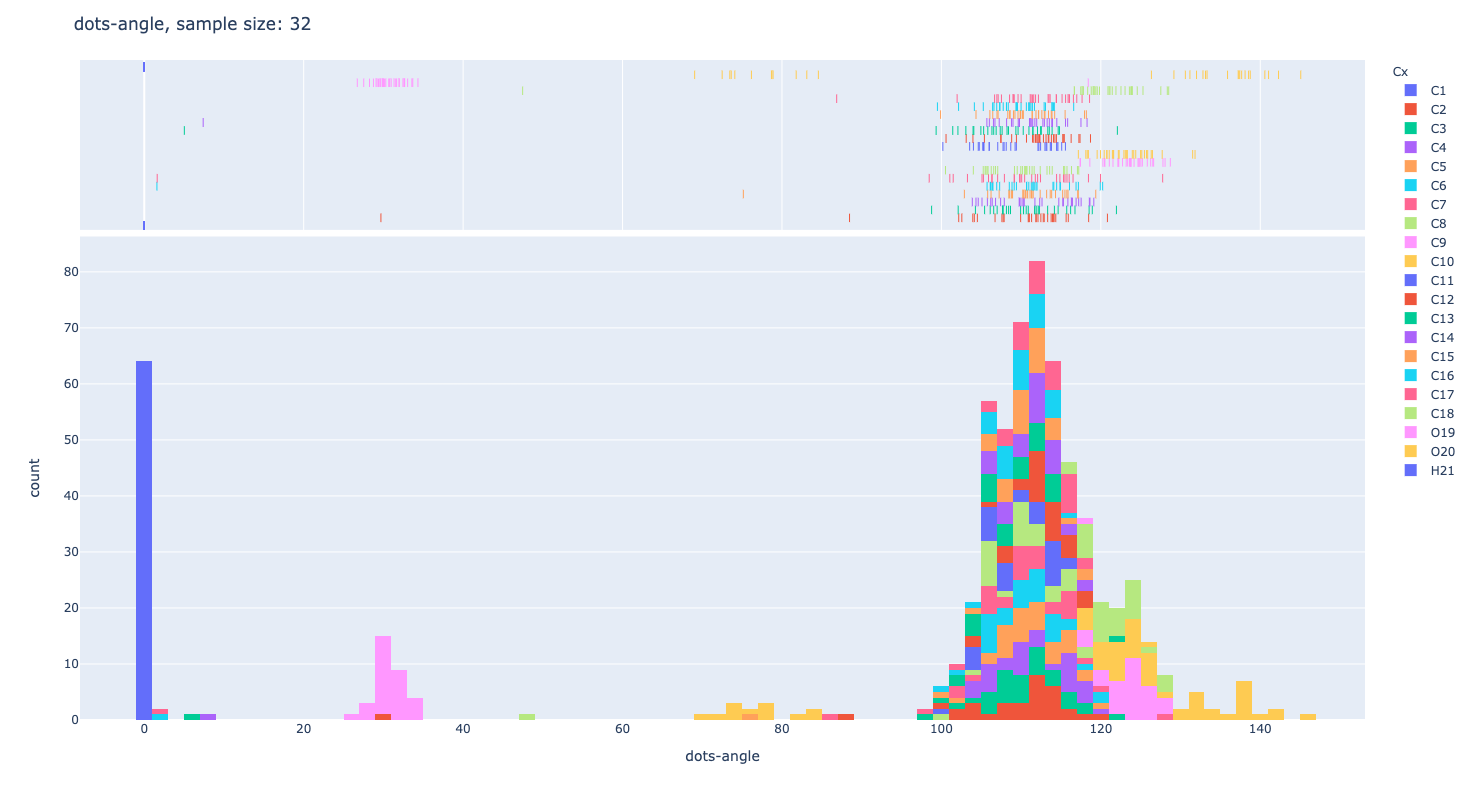

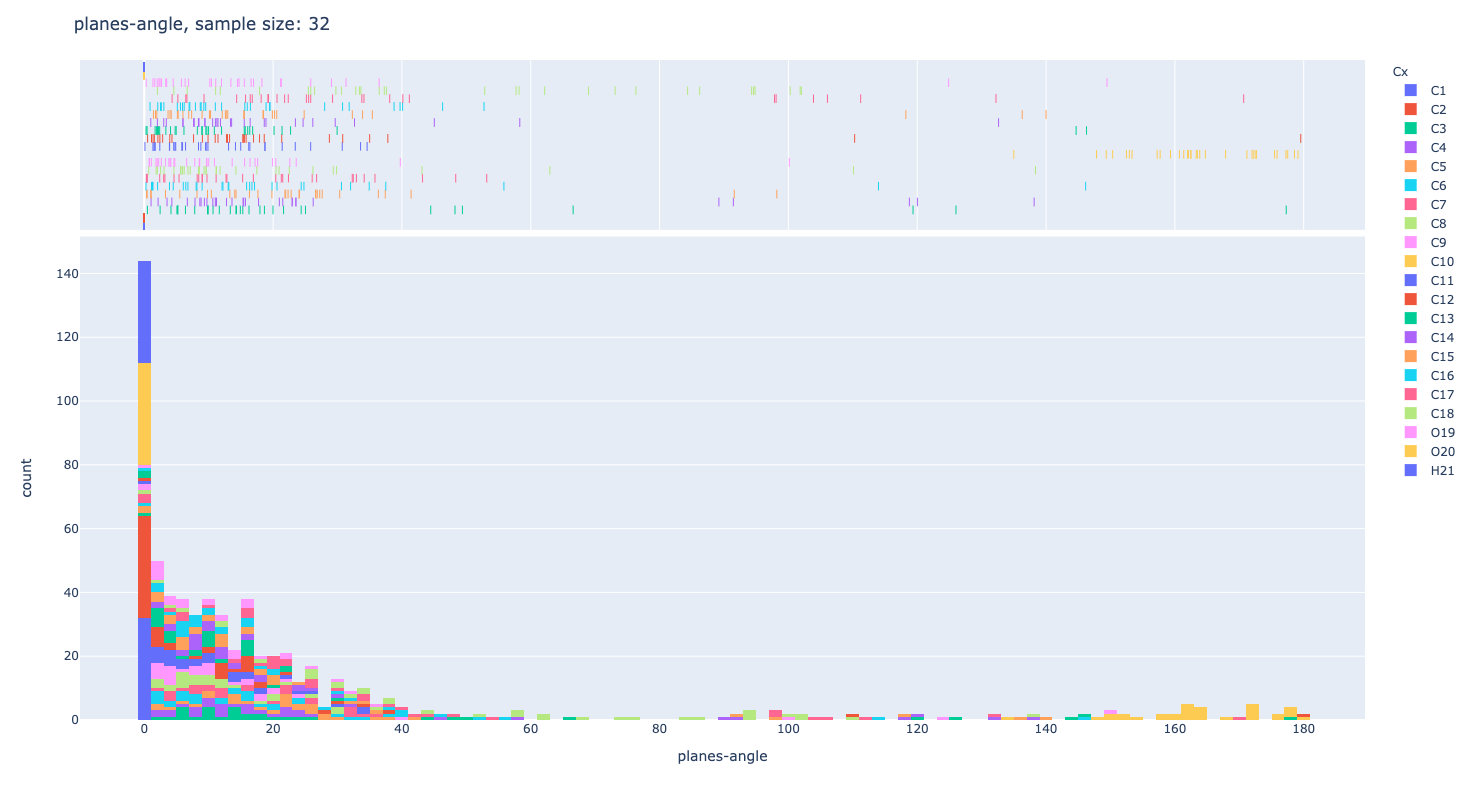

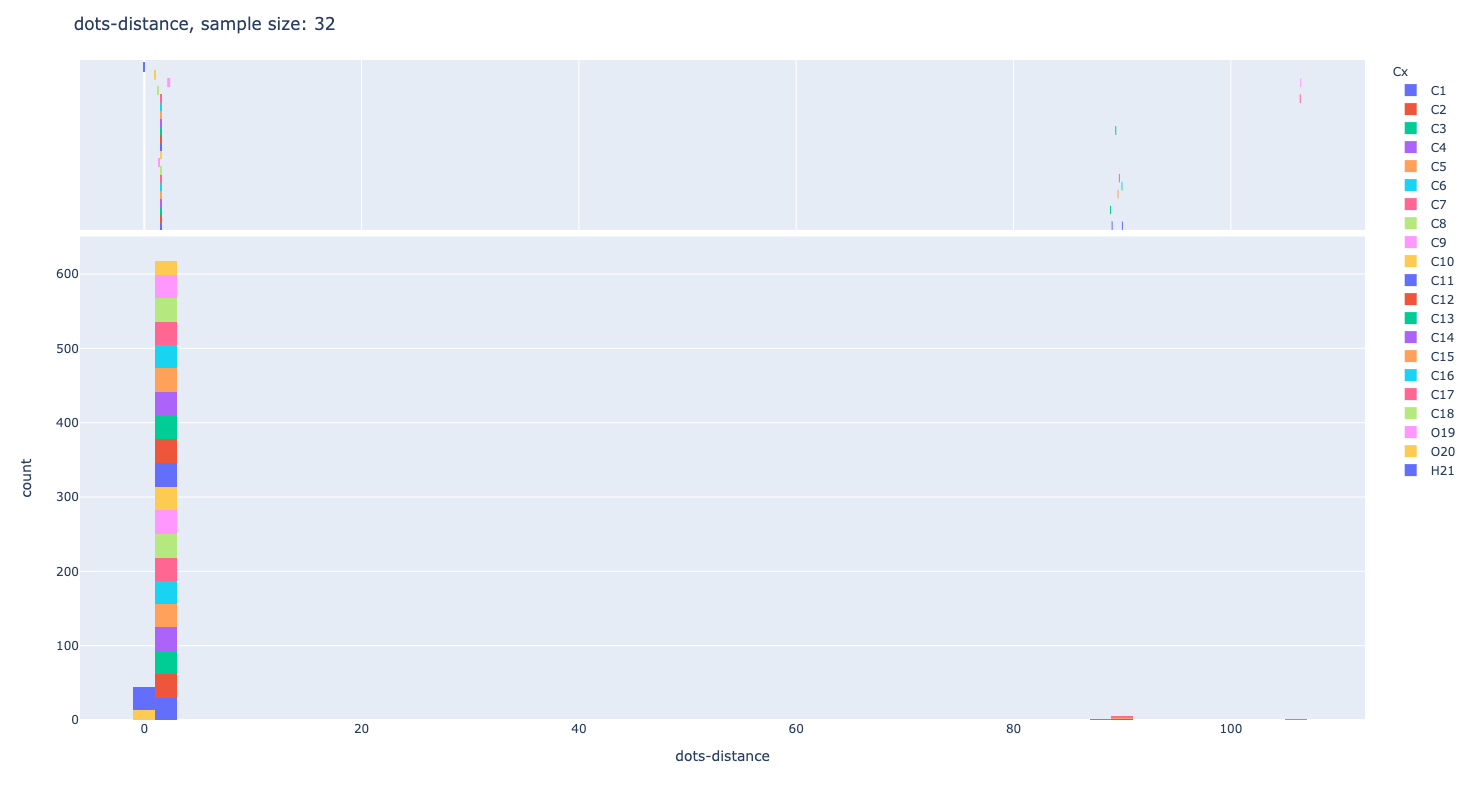

In [123]:
protein_hist(df,xlabel="dots-angle")
protein_hist(df,xlabel="planes-angle")
protein_hist(df,xlabel="dots-distance")

In [125]:
Cx

0      C1
1      C2
2      C3
3      C4
4      C5
5      C6
6      C7
7      C8
8      C9
9     C10
10    C11
11    C12
12    C13
13    C14
14    C15
15    C16
16    C17
17    C18
18    O19
19    O20
20    H21
Name: Cx, dtype: object

In [152]:
def protine_sim(Cx, n_sim=1):
    sim_df = pd.concat([pd.concat([atom2distr[c][['Cx','dots-angle','dots-distance', 'planes-angle']].sample(n=1, random_state=x) for c in Cx]) for x in range(n_sim)])
    return(sim_df)

In [180]:
def protein_sim(df,xlabel="dots-angle",):
    n_sim = sum(protine_sim_df['Cx'] == 'C1')
    fig = px.histogram(df, x=xlabel, color="Cx", nbins=100,marginal="rug")
    fig.update_layout(title="Simulated {0}, n_sim: {1}".format(xlabel, n_sim))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_sim.html".format(xlabel))
    pio.write_image(fig, "output/{}_sim.png".format(xlabel))

In [184]:
#protine_sim_df = protine_sim(Cx, n_sim=300)

C_tmp = ["C"+str(x) for x in range(1,12)]
protine_sim_df = protine_sim(C_tmp, n_sim=500)

display(protine_sim_df)
protine_sim_df.to_csv("output/simulated_data.csv")

,Cx,dots-angle,dots-distance,planes-angle
0,C1,0.000000,1.529510,0.000000
1,C2,113.328486,1.530653,0.000000
2,C3,104.265828,1.531078,48.241454
3,C4,116.390232,1.521151,120.030628
4,C5,115.210597,1.537205,8.190460
...,...,...,...,...
6,C7,103.265833,1.523877,4.624605
7,C8,113.902565,1.530817,6.204234
8,C9,124.808298,1.391330,1.101697
9,C10,131.816529,1.536652,147.835211


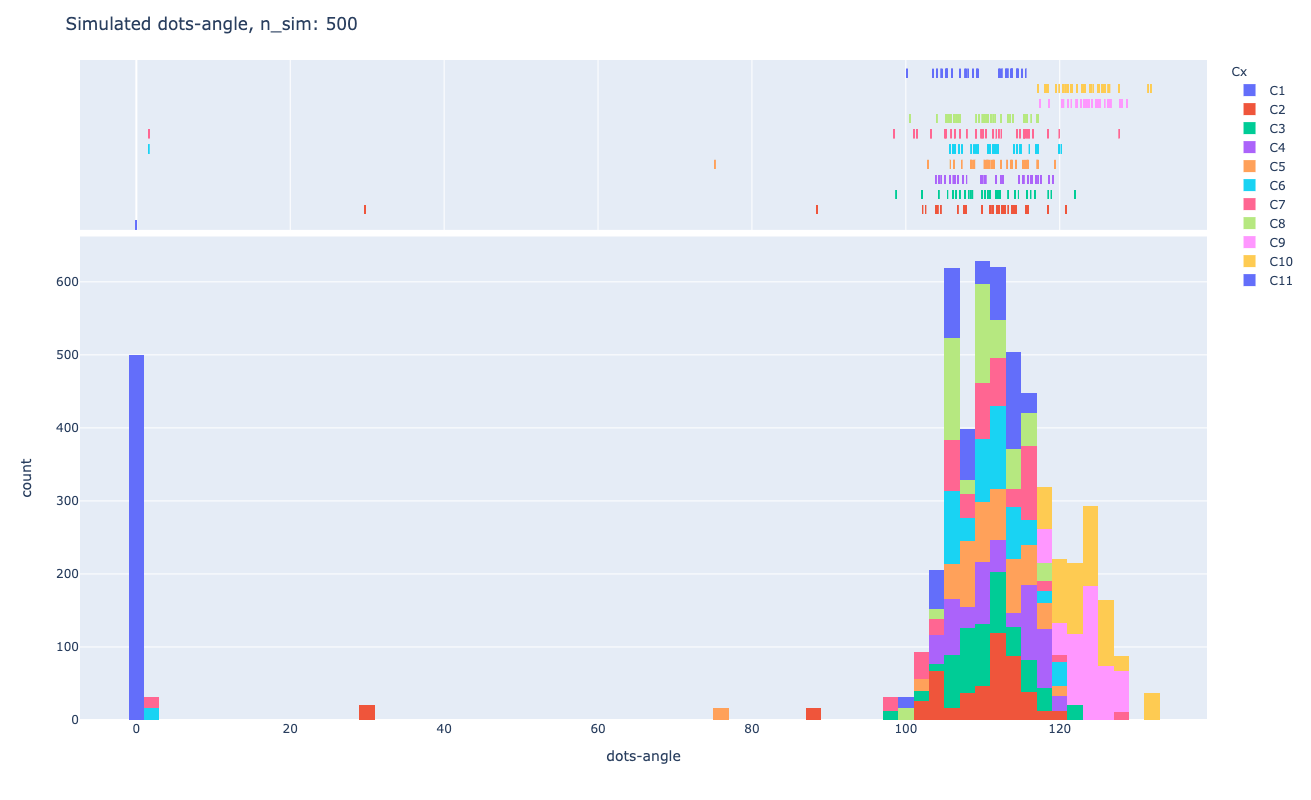

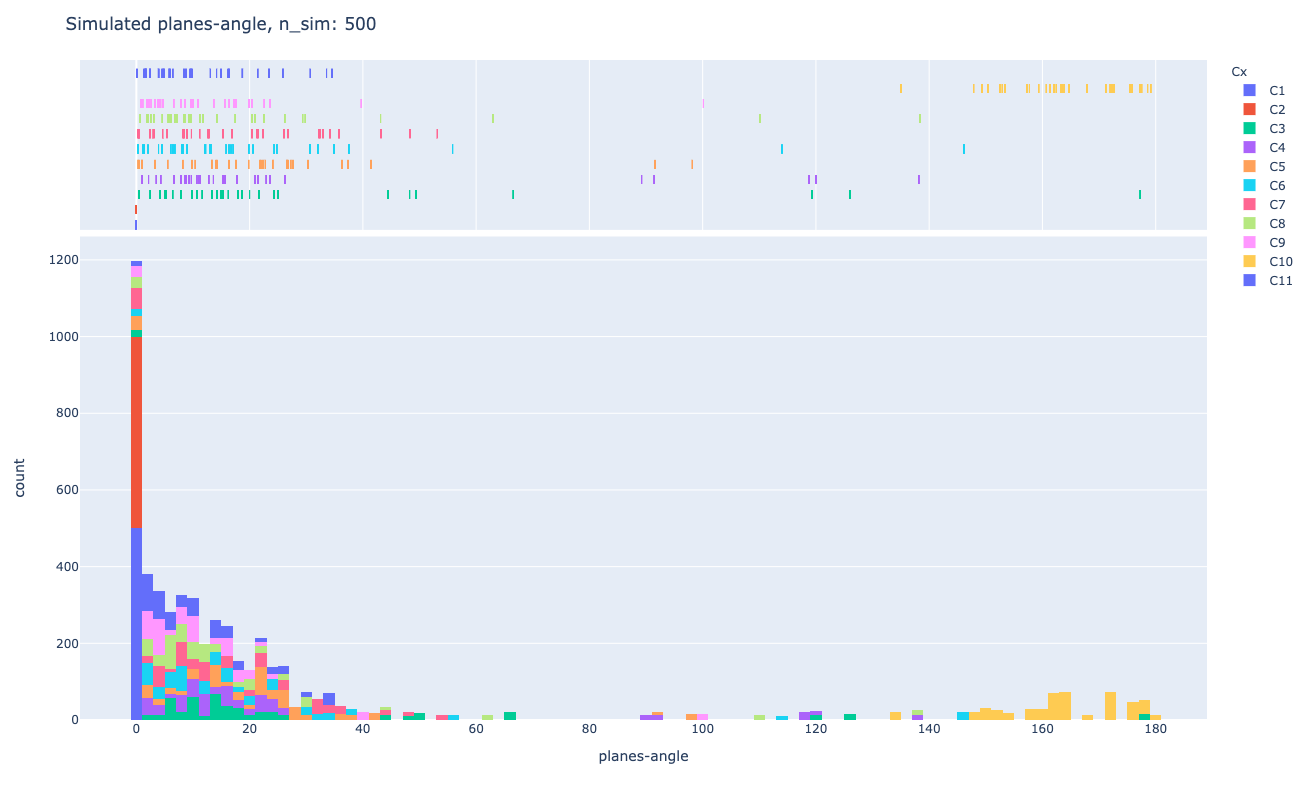

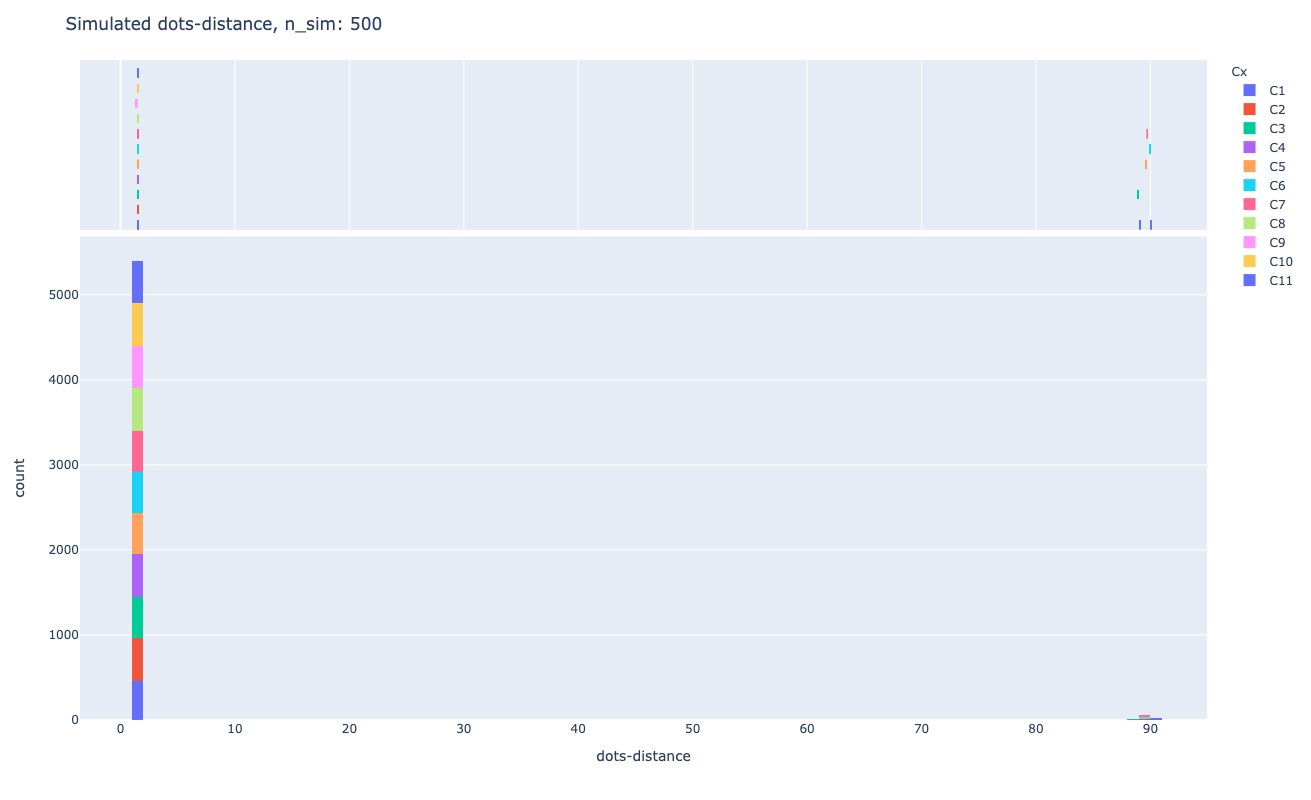

In [185]:
protein_sim(protine_sim_df,xlabel="dots-angle")
protein_sim(protine_sim_df,xlabel="planes-angle")
protein_sim(protine_sim_df,xlabel="dots-distance")

In [186]:
import os
os.system("gsutil -m cp output/*.html gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.png gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.csv gs://protein-dynamics-ai/")

0